# Super-mart Sales Analytics

## Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Inital Data Exploration

In [20]:
dmart = pd.read_csv('supermarket_sales.csv')


In [21]:
dmart.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Solapur,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Mohol,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Solapur,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Solapur,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Solapur,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Mohol,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/19,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Solapur,Member,Female,NaN,68.84,6.0,20.6520,433.6920,2/25/19,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Mohol,Normal,Female,NaN,73.56,10.0,36.7800,772.3800,2/24/19,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Solapur,Member,Female,NaN,36.26,2.0,3.6260,76.1460,01-10-2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Pandharpur,Member,Female,NaN,54.84,3.0,8.2260,172.7460,2/20/19,13:27,Credit card,164.52,4.761905,8.2260,5.9


## Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

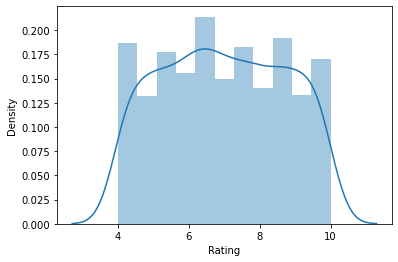

In [23]:
sns.distplot(dmart['Rating'])

**Question 2:** Do aggregate sales numbers differ by much between branches?

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


A    342
B    333
C    328
Name: Branch, dtype: int64

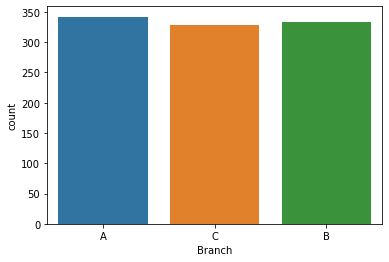

In [28]:
sns.countplot(dmart['Branch'])
dmart['Branch'].value_counts()

## Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

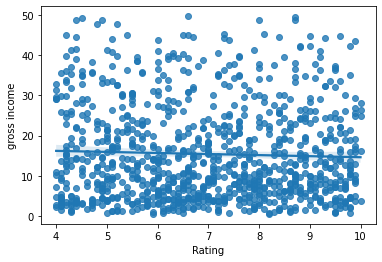

In [35]:
#sns.scatterplot(dmart['Rating'],dmart['gross income'])
sns.regplot(dmart['Rating'],dmart['gross income'])


## Task 4: Dealing With Duplicate Rows and Missing Values

In [36]:
dmart.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
998     False
999     False
1000     True
1001     True
1002     True
Length: 1003, dtype: bool

In [37]:
dmart.drop_duplicates

<bound method DataFrame.drop_duplicates of        Invoice ID Branch        City Customer type  Gender  \
0     750-67-8428      A     Solapur        Member  Female   
1     226-31-3081      C       Mohol        Normal  Female   
2     631-41-3108      A     Solapur        Normal    Male   
3     123-19-1176      A     Solapur        Member    Male   
4     373-73-7910      A     Solapur        Normal    Male   
...           ...    ...         ...           ...     ...   
998   347-56-2442      A     Solapur        Normal    Male   
999   849-09-3807      A     Solapur        Member  Female   
1000  849-09-3807      A     Solapur        Member  Female   
1001  745-74-0715      A     Solapur        Normal    Male   
1002  452-04-8808      B  Pandharpur        Normal    Male   

                Product line  Unit price  Quantity   Tax 5%     Total  \
0          Health and beauty       74.69       7.0  26.1415  548.9715   
1     Electronic accessories       15.28       5.0   3.8200   80.2

In [38]:
dmart.duplicated().sum()

3

In [41]:
dmart.drop_duplicates(inplace = True)

In [42]:
dmart.duplicated().sum()

0

In [43]:
dmart.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

<AxesSubplot:>

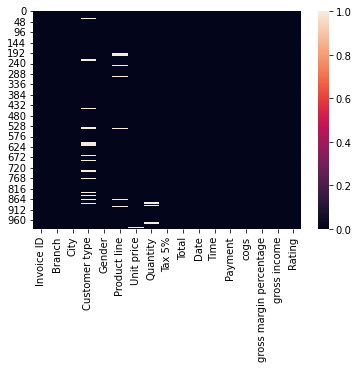

In [44]:
sns.heatmap(dmart.isnull())

In [50]:
dmart.fillna(dmart.mean())

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1204/2220935328.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dmart.fillna(dmart.mean())


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Solapur,Member,Female,Health and beauty,74.690000,7.0,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Mohol,Normal,Female,Electronic accessories,15.280000,5.0,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Solapur,Normal,Male,Home and lifestyle,46.330000,7.0,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Solapur,Member,Male,Health and beauty,58.220000,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Solapur,Normal,Male,Sports and travel,86.310000,7.0,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Mohol,Normal,Male,Health and beauty,55.700292,1.0,2.0175,42.3675,1/29/19,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Pandharpur,Normal,Female,Home and lifestyle,55.700292,10.0,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Solapur,Member,Male,Food and beverages,55.700292,1.0,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Solapur,Normal,Male,Home and lifestyle,65.820000,1.0,3.2910,69.1110,2/22/19,15:33,Cash,65.82,4.761905,3.2910,4.1


<AxesSubplot:>

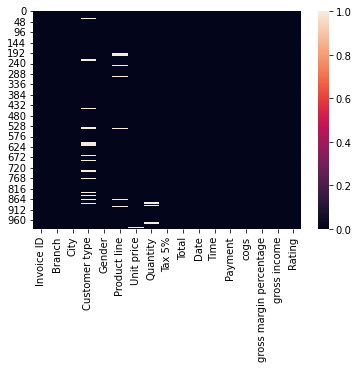

In [52]:
sns.heatmap(dmart.isnull())